## Exploratory Machine Learning Analysis

We have a main dataset that we will use to train a model, and predict the Life Ladder values.

### We are using the per Capita Database now, to compare with the others.

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Main dataset.
df = pd.read_csv('ds31_all_per_capita_emissions.csv')
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [3]:
# Drop any and all NaN values.
df = df.dropna()
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [4]:
# Split values.
X = df.drop(columns=['Life Ladder', 'Country'])
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Create scaler instance and fit training data.
X_scaler = StandardScaler().fit(X_train)
# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# View standardization.
X_train_scaled

array([[-0.7902785 ,  0.44813363, -0.11386396,  2.02303604, -0.95403057,
        -0.85296376],
       [-0.40674393, -0.66232441, -0.20099565, -0.56309679, -0.53303537,
        -0.6683169 ],
       [ 0.74385979, -1.36920263, -0.1121788 , -0.16720847, -0.77716472,
        -0.69483754],
       ...,
       [ 0.36032522,  0.9297969 ,  0.19250893, -0.35608499, -0.62832014,
        -0.61114737],
       [-0.40674393,  0.82059163, -2.40630147, -0.02371553, -0.99823295,
        -0.9649445 ],
       [-0.40674393, -0.68530326,  0.40761301,  0.28825674,  0.12010811,
         0.25058597]])

In [7]:
# Create regression model.
model = LinearRegression(n_jobs=-1)

In [8]:
# Fit the model.
model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=-1)

In [9]:
# Make predictions.
pred = model.predict(X_test_scaled)

In [10]:
# Compare the results.
results = pd.DataFrame(zip(pred, y_test), columns=['Predicted', 'Actual'])
results['Difference'] = abs(results['Predicted'] - results['Actual'])
results

,Predicted,Actual,Difference
0,7.334443,7.177,0.157443
1,5.276882,5.743,0.466118
2,6.326278,6.904,0.577722
3,5.466006,4.983,0.483006
4,6.017352,5.711,0.306352
...,...,...,...
216,5.538160,5.792,0.253840
217,6.984696,7.026,0.041304
218,5.819746,4.770,1.049746
219,6.147374,5.975,0.172374


In [11]:
# Style.
from matplotlib import style
style.use('fivethirtyeight')

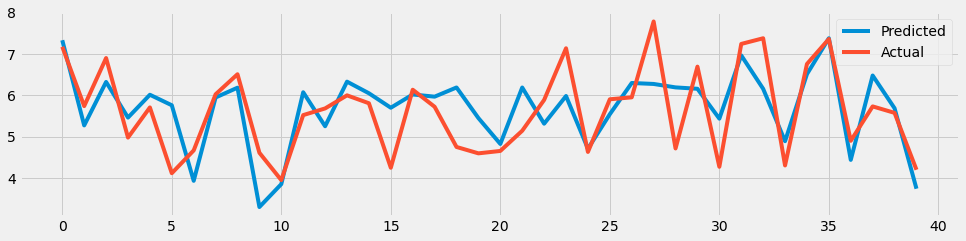

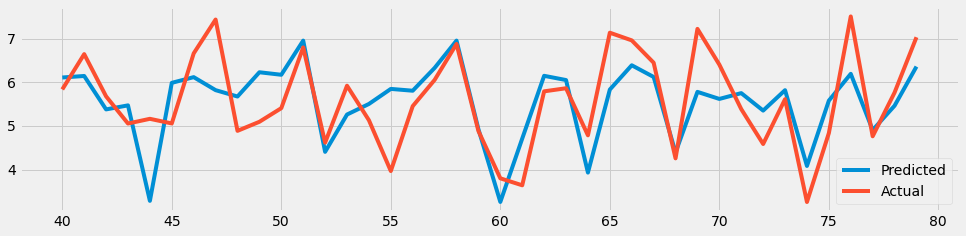

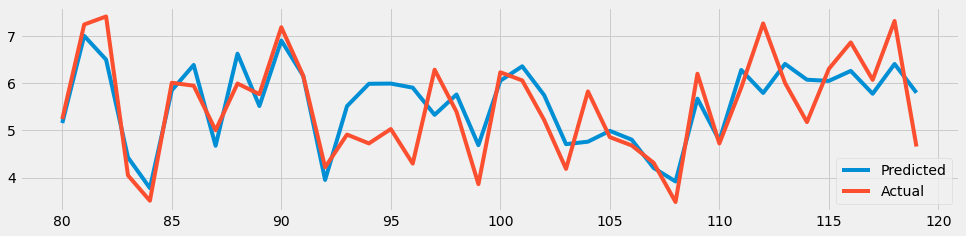

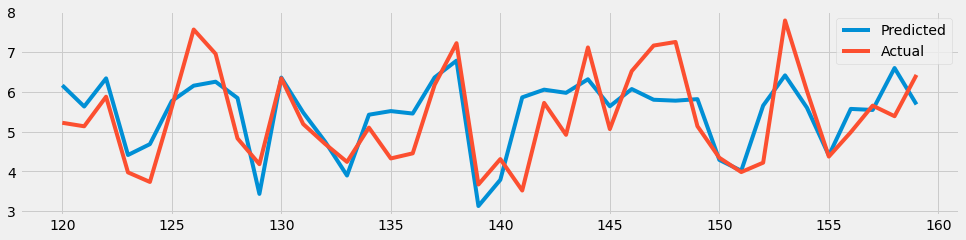

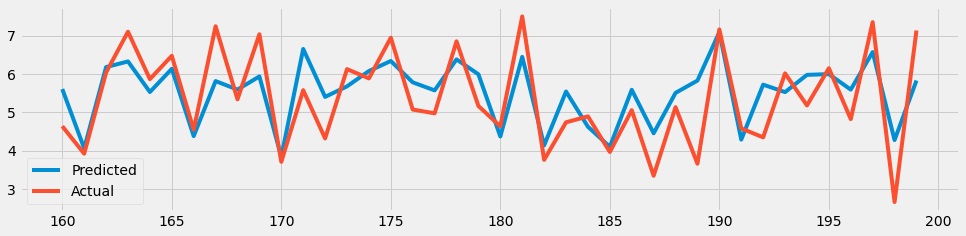

In [12]:
# Try and plot the differences.
bins = [0, 40, 80, 120, 160]
for i in bins:
    results.iloc[i:i+40].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))

In [13]:
# Save results DF to compare to other models.
results.to_csv('ml_results/33_ml_results.csv', index=False)